In [5]:
using Plots; pyplot()
using AugmentedGaussianProcesses
using MLDataUtils

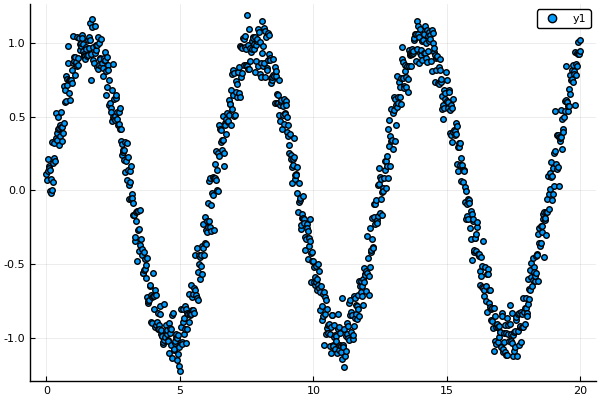

In [6]:
N = 2000
X,y = noisy_sin(N,0,20,noise=0.1)
X = reshape(X,:,1)
X_train = X[1:2:end,:]; y_train = y[1:2:end]
X_test = X[2:2:end,:]; y_test = y[2:2:end]
scatter(X_train,y_train)

In [7]:
function plot_model(X,X_test,X_train,y_train,model)
    y_pred, sig_pred = proba_y(model,X_test)
    plot(X,sin,lab="f",color=:black,lw=3.0,ylims=(-2,2))
    plot!(X_test,y_pred,ribbon=sqrt.(sig_pred),lab="Prediction",lw=3.0)
    scatter!(X_train,y_train,msw=0.0,alpha=0.5,lab="Data")
    scatter!(model.f[1].Z,model.f[1].μ,lab="IP")
end

plot_model (generic function with 1 method)

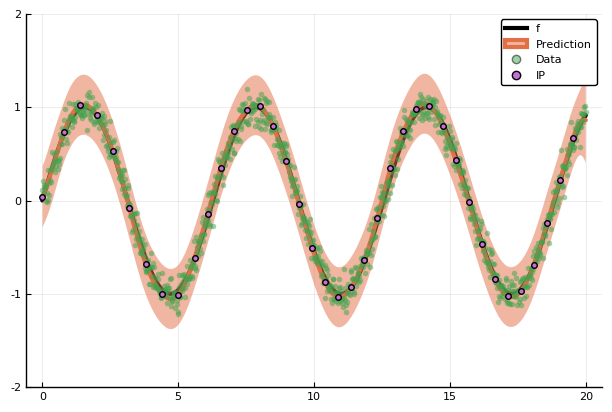

┌ Info: Saved animation to 
│   fn = /home/theo/.julia/dev/AugmentedGaussianProcesses/examples/tmp.gif
└ @ Plots /home/theo/.julia/packages/Plots/rNwM4/src/animation.jl:98


Plots.AnimatedGif("/home/theo/.julia/dev/AugmentedGaussianProcesses/examples/tmp.gif")
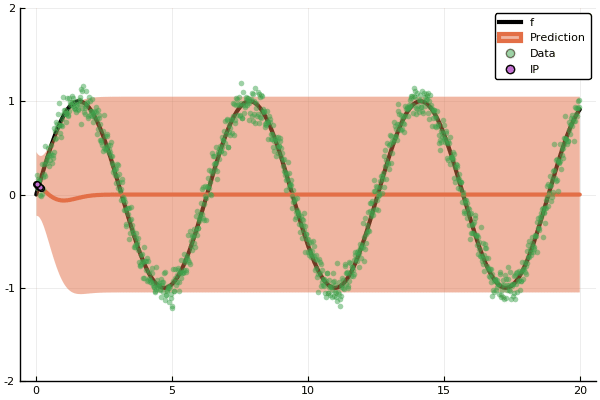

In [9]:
k = SqExponentialKernel()
IP_alg = OIPS(0.8,nothing)
model = OnlineSVGP(k,GaussianLikelihood(0.1),AnalyticVI(),IP_alg)
preds = []
anim = Animation()
for (X_batch,y_batch) in eachbatch((X_train,y_train), obsdim=1, size=10)
    train!(model,X_batch,y_batch,iterations=3)
    plot_model(X,X_test,X_train,y_train,model)
    frame(anim)
end
gif(anim,fps=4)